In [1]:
from time import time
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('all/train.csv')
test = pd.read_csv('all/test.csv')

columns_to_drop  = ["Name", "Ticket", "Cabin"]

train_aug = train.drop(columns_to_drop, axis = 1)
test_aug = test.drop(columns_to_drop, axis = 1)

train_aug = train_aug.replace(np.nan, 0)
test_aug =  test_aug.replace(np.nan, 0)

train_aug["Embarked"] = train_aug.apply(lambda row: int(row["Embarked"].encode('utf-8').hex(), 16) \
                                        if type(row["Embarked"]) == str else row["Embarked"], axis=1)
test_aug["Embarked"] = test_aug.apply(lambda row: int(row["Embarked"].encode('utf-8').hex(), 16) \
                                        if type(row["Embarked"]) == str else row["Embarked"], axis=1)

train_aug["Sex"] = train_aug.apply(lambda row: 1 if row["Sex"] == "female" else 0, axis = 1)
test_aug["Sex"] = test_aug.apply(lambda row: 1 if row["Sex"] == "female" else 0, axis  = 1)

# #Key was needed to the int's could fit into the dataframe
# #   - key value was chosen abitrarily
# key = 111222333

# for column in train_aug:
#     train_aug[column] = train_aug.apply(lambda row: int(row[column].encode('utf-8').hex(), 16)/key \
#                                 if type(row[column]) == str else row[column], axis=1)
# for column in test_aug:
#     test_aug[column] = test_aug.apply(lambda row: int(row[column].encode('utf-8').hex(), 16)/key \
#                                 if type(row[column]) == str else row[column], axis=1)

In [3]:
#Test cell
train_aug.head()#.as_matrix().tolist()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,83
1,2,1,1,1,38.0,1,0,71.2833,67
2,3,1,3,1,26.0,0,0,7.9250,83
3,4,1,1,1,35.0,1,0,53.1000,83
4,5,0,3,0,35.0,0,0,8.0500,83


In [4]:
#Test cell
test_aug.head()#.as_matrix().tolist()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,81
1,893,3,1,47.0,1,0,7.0000,83
2,894,2,0,62.0,0,0,9.6875,81
3,895,3,0,27.0,0,0,8.6625,83
4,896,3,1,22.0,1,1,12.2875,83


In [5]:
#test cell
a = [1,2, 3]
b = [4,5, 6]
print(a)
print(b)
print(a+b)
c = (a+b)
print(c[:2] + c[2:])
int("female".encode('utf-8').hex(), 16)/111222333
# type(7.462530e-07)
int('S'.encode('utf-8').hex(), 16)

[1, 2, 3]
[4, 5, 6]
[1, 2, 3, 4, 5, 6]
[1, 2, 3, 4, 5, 6]


83

In [8]:
# data_train = train_aug.as_matrix().tolist()
# features_train = list(map(lambda passenger: passenger[:1] + passenger[2:3] + passenger[4:], data_train))
# labels_train =  list(map(lambda passenger: passenger[1] , data))

# data_test = test_aug.as_matrix().tolist()
# features_test = list(map(lambda passenger: passenger[:1] + passenger[2:3] + passenger[4:], data_test))
# labels_test =  list(map(lambda passenger: passenger[1] , data))
data_train = train_aug.as_matrix().tolist()
features_train = list(map(lambda passenger: passenger[:1] + passenger[2:], data_train))
labels_train =  list(map(lambda passenger: passenger[1] , data_train))

data_test = test_aug.as_matrix().tolist()
features_test = data_test
# print(data_test)
# print(labels)

## Test Plots

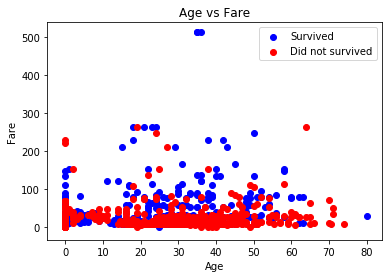

In [36]:
import matplotlib.pyplot as plt
plt.clf()
f1_name = list(train_aug)[4]
f2_name = list(train_aug)[7]

# for passenger, aod in zip(features_train, labels_train):
#     if(aod):
#         plt.scatter(passenger[3], passenger[6], color = 'b')
#     else:
#         plt.scatter(passenger[3], passenger[6], color = 'r')
x_s = []
y_s = []
x_d = []
y_d = []
for passenger, aod in zip(features_train, labels_train):
    if(aod):
        x_s.append(passenger[3])
        y_s.append(passenger[6])
    else:
        x_d.append(passenger[3])
        y_d.append(passenger[6])
        
plt.scatter(x_s, y_s, label = 'Survived', color = 'b')
plt.scatter(x_d, y_d, label = 'Did not survived', color = 'r')

plt.title(f1_name+" vs "+f2_name)
plt.xlabel(f1_name)
plt.ylabel(f2_name)
plt.legend()
plt.show()

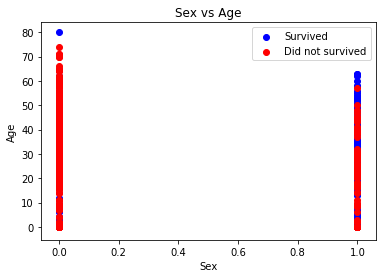

In [37]:
import matplotlib.pyplot as plt
plt.clf()
f1_name = list(train_aug)[3]
f2_name = list(train_aug)[4]

x_s = []
y_s = []
x_d = []
y_d = []
for passenger, aod in zip(features_train, labels_train):
    if(aod):
        x_s.append(passenger[2])
        y_s.append(passenger[3])
    else:
        x_d.append(passenger[2])
        y_d.append(passenger[3])
        
plt.scatter(x_s, y_s, label = 'Survived', color = 'b')
plt.scatter(x_d, y_d, label = 'Did not survived', color = 'r')

plt.title(f1_name+" vs "+f2_name)
plt.xlabel(f1_name)
plt.ylabel(f2_name)
plt.legend()
plt.show()

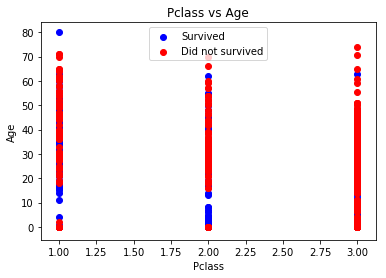

In [41]:
import matplotlib.pyplot as plt
plt.clf()
f1_name = list(train_aug)[2]
f2_name = list(train_aug)[4]

x_s = []
y_s = []
x_d = []
y_d = []
for passenger, aod in zip(features_train, labels_train):
    if(aod):
        x_s.append(passenger[1])
        y_s.append(passenger[3])
    else:
        x_d.append(passenger[1])
        y_d.append(passenger[3])
        
plt.scatter(x_s, y_s, label = 'Survived', color = 'b')
plt.scatter(x_d, y_d, label = 'Did not survived', color = 'r')

plt.title(f1_name+" vs "+f2_name)
plt.xlabel(f1_name)
plt.ylabel(f2_name)
plt.legend()
plt.show()

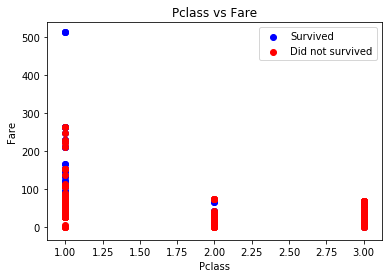

In [39]:
import matplotlib.pyplot as plt
plt.clf()
f1_name = list(train_aug)[2]
f2_name = list(train_aug)[7]

x_s = []
y_s = []
x_d = []
y_d = []
for passenger, aod in zip(features_train, labels_train):
    if(aod):
        x_s.append(passenger[1])
        y_s.append(passenger[6])
    else:
        x_d.append(passenger[1])
        y_d.append(passenger[6])
        
plt.scatter(x_s, y_s, label = 'Survived', color = 'b')
plt.scatter(x_d, y_d, label = 'Did not survived', color = 'r')

plt.title(f1_name+" vs "+f2_name)
plt.xlabel(f1_name)
plt.ylabel(f2_name)
plt.legend()
plt.show()

In [22]:
from sklearn.tree import DecisionTreeClassifier as dt

clf  = dt()

t0 = time()
clf.fit(features_train, labels_train)
print("training time:", round(time()-t0, 3), "s")

t0 = time()
pred = clf.predict(features_test)
print("prediction time:", round(time()-t0, 3), "s")

# from sklearn.metrics import accuracy_score
# acc = accuracy_score(pred, labels_test)

# print(acc)
result = test_aug["PassengerId"].to_frame()
result["Survived"] = pd.Series(pred)
result = result.set_index("PassengerId")
result.to_csv('all/results.csv')
result.head()

training time: 0.004 s
prediction time: 0.0 s


,Survived
PassengerId,
892,0.0
893,0.0
894,0.0
895,1.0
896,0.0


In [49]:
actual = pd.read_csv('all/gender_submission.csv')
from sklearn.metrics import accuracy_score
acc = accuracy_score(actual["Survived"], result["Survived"])
print("Classifier Accuracy: "+ str(acc))

Classifier Accuracy: 0.782296650718
